<a href="https://colab.research.google.com/github/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/blob/main/01_Signal_Processing_Ciani%2BDalle_Rive_Prieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [334]:
# Data
import pandas as pd

# Math
import numpy as np

# Graficas
import matplotlib.pyplot as plt

# Manejo de directorios
import shutil
import os

# Funciones

In [335]:
def graficar_t_VS_muestras(tiempo, datos, xlabel='Tiempo (s)', ylabel='Amplitud',xlim=None, ylim=None, titulo='Gráfico', grid=True):
    """
    Función para graficar datos utilizando matplotlib.

    Args:
        tiempo (list or array): Datos del eje x (tiempo).
        datos (list or array): Datos del eje y (muestras).
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Valor'.
        titulo (str): Título del gráfico. Default 'Gráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, datos)
    plt.xlabel(xlabel)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

def fft(signal, fs, xlim=None, ylim=None, xlabel='Frecuencia (Hz)', ylabel='Magnitud', titulo='Transformada de Fourier', grid=True):
    """
    Calcula y grafica la FFT de una señal.

    Args:
        signal (array): Señal en el dominio del tiempo.
        fs (float): Frecuencia de muestreo.
        xlim (tuple): Límites del eje x (min, max). Default None.
        ylim (tuple): Límites del eje y (min, max). Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Frecuencia (Hz)'.
        ylabel (str): Etiqueta para el eje y. Default 'Magnitud'.
        titulo (str): Título del gráfico. Default 'Transformada de Fourier'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    # Calcula la FFT de la señal
    fft_signal = np.fft.fft(signal)

    # Calcula la magnitud de la FFT
    magnitude = np.abs(fft_signal)

    # Calcula la frecuencia correspondiente a cada componente de la FFT
    freqs = np.fft.fftfreq(len(signal), 1/fs)

    # Solo usamos la mitad del espectro, ya que la otra mitad es simétrica
    half_n = len(signal) // 2
    frequencies = freqs[:half_n]
    magnitudes = magnitude[:half_n]

    # Graficar la magnitud de la FFT
    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, magnitudes)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.show()

def graficar_multisignales(tiempos_list, datos_list, labels=None, xlabel='Tiempo (s)', ylabel='Amplitud', titulo='Multigráfico', grid=True):
    """
    Función para graficar múltiples señales en un solo gráfico utilizando matplotlib.

    Args:
        tiempos_list (list of arrays): Lista de vectores de tiempo, uno para cada señal.
        datos_list (list of arrays): Lista de señales (datos) a graficar.
        labels (list of str): Lista de etiquetas para cada señal. Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Amplitud'.
        titulo (str): Título del gráfico. Default 'Multigráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))

    # Graficar cada señal con su respectivo vector de tiempo
    for i, (tiempos, datos) in enumerate(zip(tiempos_list, datos_list)):
        if labels and i < len(labels):
            plt.plot(tiempos, datos, label=labels[i])
        else:
            plt.plot(tiempos, datos)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    if labels:
        plt.legend()
    plt.grid(grid)
    plt.show()


# Información de la LDR

Un fotoresistor o LDR (light-dependent resistor),está conformado por un semicondiuctor (sulfuro de Cadmio) el cual al recibir los fotones incidentes de la luz, provoca que los electrones pasen a la banda de conducción, disminuyendo así, la resistencia del componenete.

La resistencia de estos componentes suele variar entre: 50 ohms (plena luz) y 1M ohms (oscuridad).  

En cuanto a la medición de la iluminancia, éste sensor no sería preciso debido a su gran variación de resistencia respecto a la temperatura y a la longitud de onda de la señal:

# Importamos los datos

In [336]:
repo_path = 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'

if os.path.exists(repo_path):
    shutil.rmtree(repo_path)

!git clone https://github.com/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto

Cloning into 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 108 (delta 41), reused 66 (delta 17), pack-reused 0
Receiving objects: 100% (108/108), 926.62 KiB | 2.82 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [337]:
data_1 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/08-ldr-fs_100Hz-60imgs-60fps.json")
data_2 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/06-ldr-fs_100Hz-50imgs-60fps.json")
data_3 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/05-ldr-fs_100Hz-40imgs-60fps.json")
data_4 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/04-ldr-fs_100Hz-30imgs-60fps.json")
data_5 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/03-ldr-fs_100Hz-20imgs-60fps.json")
data_6 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/02-ldr-fs_100Hz-10imgs-60fps.json")
#data_7 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/06-ldr-fs_100Hz-50imgs-60fps.json")
data_8 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/09-ldr-fs_100Hz-60imgs-90fps.json")
data_9 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/10-ldr-fs_100Hz-60imgs-120fps.json")
data_10 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/11-ldr-fs_100Hz-60imgs-240fps.json")
data_11 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/12-ldr-fs_100Hz-70imgs-60fps.json")
data_1.head()

,timestamp(ms),LDR,Unnamed: 2
0,1.723158e+09,196,NaN
1,1.723158e+09,192,NaN
2,1.723158e+09,211,NaN
3,1.723158e+09,208,NaN
4,1.723158e+09,193,NaN


# Análisis de los datos

## Tratamiento y visualización

In [338]:
# Borramos columna unnamed
data_1.drop(columns=['Unnamed: 2'], inplace=True)
data_2.drop(columns=['Unnamed: 2'], inplace=True)
data_3.drop(columns=['Unnamed: 2'], inplace=True)
data_4.drop(columns=['Unnamed: 2'], inplace=True)
data_5.drop(columns=['Unnamed: 2'], inplace=True)
data_6.drop(columns=['Unnamed: 2'], inplace=True)
#data_7.drop(columns=['Unnamed: 2'], inplace=True)
data_8.drop(columns=['Unnamed: 2'], inplace=True)
data_9.drop(columns=['Unnamed: 2'], inplace=True)
data_10.drop(columns=['Unnamed: 2'], inplace=True)
data_11.drop(columns=['Unnamed: 2'], inplace=True)

data_1.head()

,timestamp(ms),LDR
0,1.723158e+09,196
1,1.723158e+09,192
2,1.723158e+09,211
3,1.723158e+09,208
4,1.723158e+09,193


In [339]:
ldr_fs100Hz_60imgs_60fps = data_1['LDR']
ldr_fs100Hz_50imgs_60fps = data_2['LDR']
ldr_fs100Hz_40imgs_60fps = data_3['LDR']
ldr_fs100Hz_30imgs_60fps = data_4['LDR']
ldr_fs100Hz_20imgs_60fps = data_5['LDR']
ldr_fs100Hz_10imgs_60fps = data_6['LDR']
#ldr_fs100Hz_60imgs_60fps = data_7['LDR']
ldr_fs100Hz_60imgs_90fps = data_8['LDR']
ldr_fs100Hz_60imgs_120fps = data_9['LDR']
ldr_fs100Hz_60imgs_240fps = data_10['LDR']
ldr_fs100Hz_70imgs_60fps = data_11['LDR']

ldr_fs100Hz_60imgs_120fps.head()

,LDR
0,220
1,219
2,210
3,205
4,209


In [340]:
len(ldr_fs100Hz_60imgs_60fps)

4105

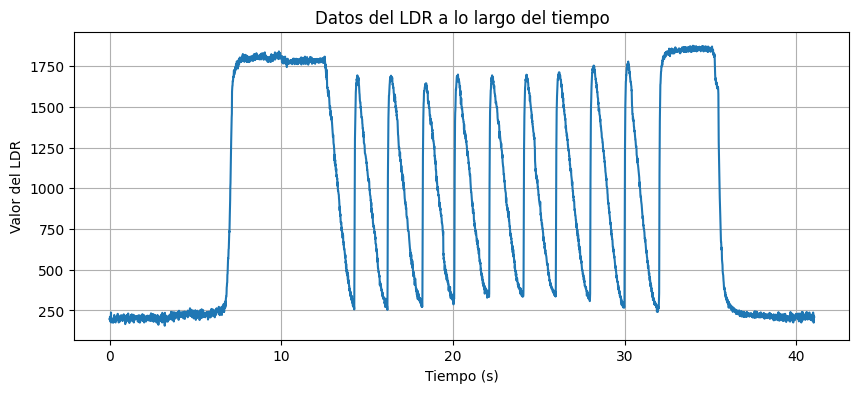

In [341]:
# Frecuencia de muestreo (Hz)
fs = 100

# Creación del vector de tiempo
t = np.arange(len(ldr_fs100Hz_60imgs_60fps)) / fs
t2 = np.arange(len(ldr_fs100Hz_50imgs_60fps)) / fs
t3 = np.arange(len(ldr_fs100Hz_40imgs_60fps)) / fs
t4 = np.arange(len(ldr_fs100Hz_30imgs_60fps)) / fs
t5 = np.arange(len(ldr_fs100Hz_20imgs_60fps)) / fs
t6 = np.arange(len(ldr_fs100Hz_10imgs_60fps)) / fs
#t7 = np.arange(len(ldr_fs100Hz_60imgs_60fps)) / fs
t8 = np.arange(len(ldr_fs100Hz_60imgs_90fps)) / fs
t9 = np.arange(len(ldr_fs100Hz_60imgs_120fps)) / fs
t10 = np.arange(len(ldr_fs100Hz_60imgs_240fps)) / fs
t11 = np.arange(len(ldr_fs100Hz_70imgs_60fps)) / fs

seniales = [ldr_fs100Hz_60imgs_60fps,
            ldr_fs100Hz_50imgs_60fps,
            ldr_fs100Hz_40imgs_60fps,
            ldr_fs100Hz_30imgs_60fps,
            ldr_fs100Hz_20imgs_60fps,
            ldr_fs100Hz_10imgs_60fps,
            ldr_fs100Hz_60imgs_90fps,
            ldr_fs100Hz_60imgs_120fps,
            ldr_fs100Hz_60imgs_240fps,
            ldr_fs100Hz_70imgs_60fps]

tiempos = [t,t2,t3,t4,t5,t6,t8,t9,t10,t11]

# Graficar
plt.figure(figsize=(10, 4))
plt.plot(t, ldr_fs100Hz_60imgs_60fps)
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor del LDR')
plt.title('Datos del LDR a lo largo del tiempo')
plt.grid(True)
plt.show()

In [342]:
# Verificamos la longitud de los ejes
for i in range(len(seniales)):
    print(len(seniales[i]))
    print(len(tiempos[i]))
#print(len(t))
#print(len(ldr_fs100Hz_60imgs_60fps))

4105
4105
3456
3456
3252
3252
3048
3048
2917
2917
2486
2486
3435
3435
3043
3043
2212
2212
4161
4161


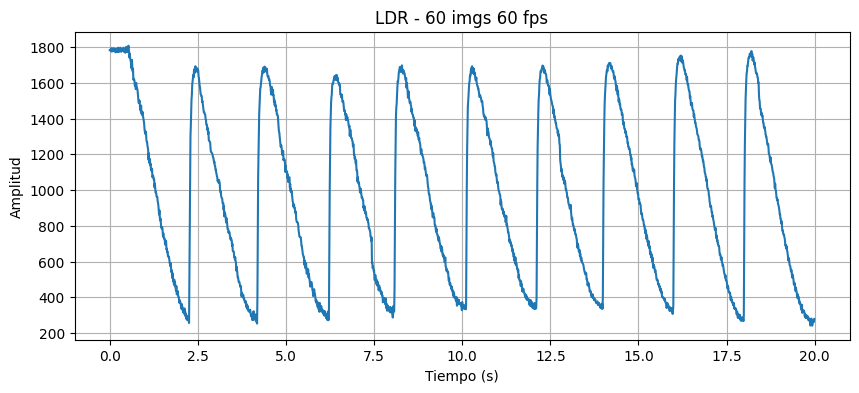

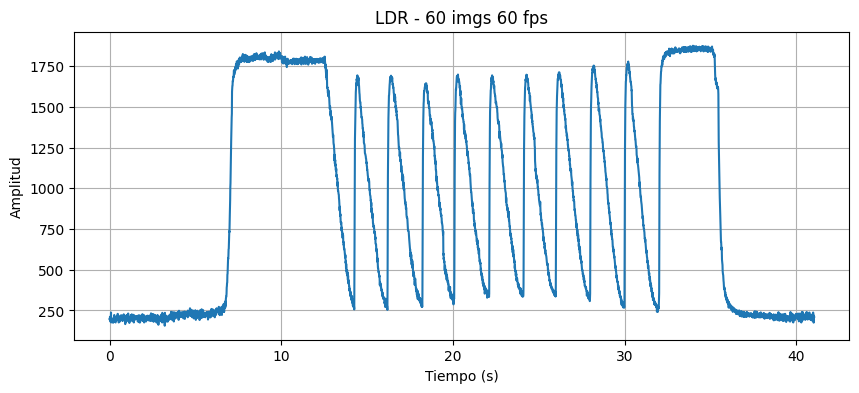

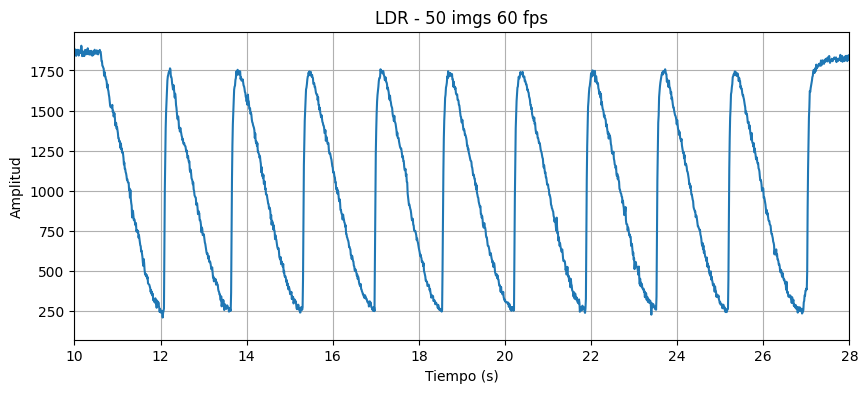

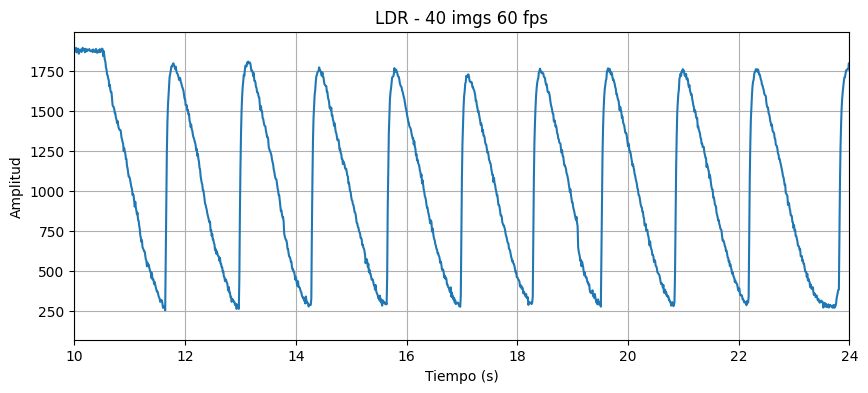

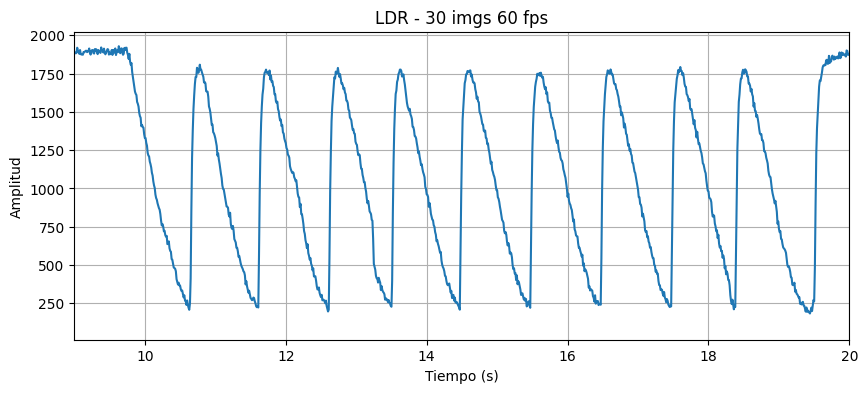

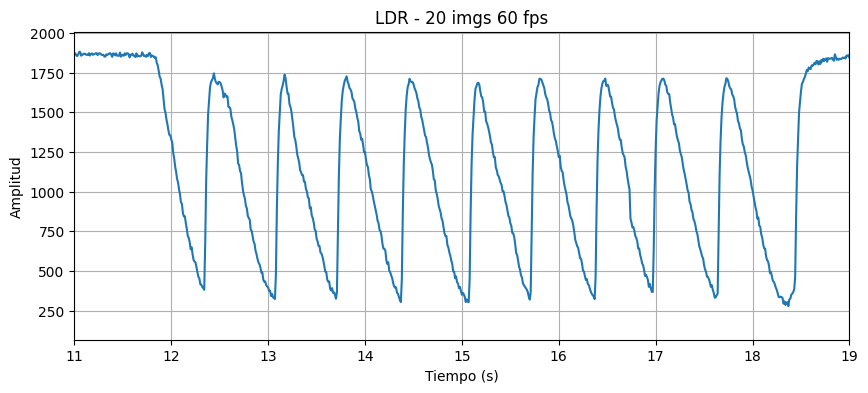

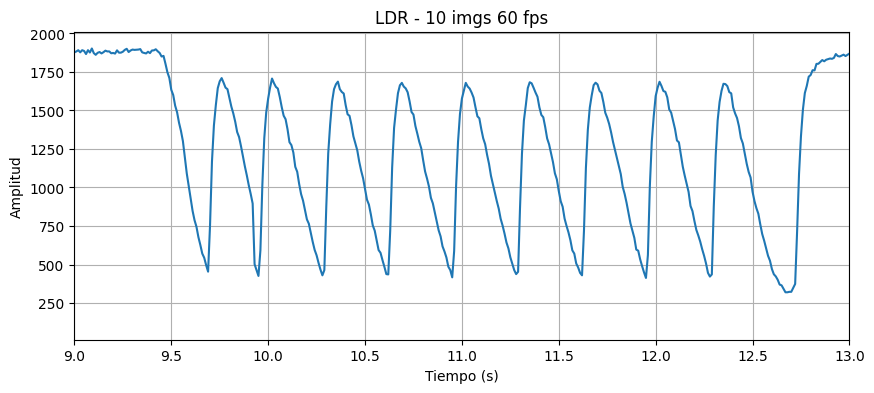

In [359]:
# Acotamos el grafico a la muestra tomada

tc1 = 12  # tiempo de corte 1
tc2 = 32  # tiempo de corte 2
t1 = tc1*fs # numero de muestra en t = tc1 [segundos]
t2 = tc2*fs # numero de muestra en t = tc2 [segundos]

ldr_acot = ldr_fs100Hz_60imgs_60fps[t1:t2]  # nos quedamos con el tramo util de la muestra
t_acot = np.arange(len(ldr_acot)) / fs  # recalculamos el vector de tiempo


graficar_t_VS_muestras(t_acot,
                       ldr_acot,
                       xlabel='Tiempo (s)',
                       ylabel='Amplitud',
                       titulo='LDR - 60 imgs 60 fps',
                       grid=True)

graficar_t_VS_muestras(tiempos[0],
                       seniales[0],
                       xlabel='Tiempo (s)',
                       xlim=(None,None),
                       ylabel='Amplitud',
                       titulo='LDR - 60 imgs 60 fps',
                       grid=True
                       )
graficar_t_VS_muestras(tiempos[1],
                       seniales[1],
                       xlabel='Tiempo (s)',
                       xlim=(10,28),
                       ylabel='Amplitud',
                       titulo='LDR - 50 imgs 60 fps',
                       grid=True
                       )

graficar_t_VS_muestras(tiempos[2],
                       seniales[2],
                       xlabel='Tiempo (s)',
                       xlim=(10,24),
                       ylabel='Amplitud',
                       titulo='LDR - 40 imgs 60 fps',
                       grid=True
                       )

graficar_t_VS_muestras(tiempos[3],
                       seniales[3],
                       xlabel='Tiempo (s)',
                       xlim=(9,20),
                       ylabel='Amplitud',
                       titulo='LDR - 30 imgs 60 fps',
                       grid=True
                       )

graficar_t_VS_muestras(tiempos[4],
                       seniales[4],
                       xlabel='Tiempo (s)',
                       xlim=(11,19),
                       ylabel='Amplitud',
                       titulo='LDR - 20 imgs 60 fps',
                       grid=True
                       )

graficar_t_VS_muestras(tiempos[5],
                       seniales[5],
                       xlabel='Tiempo (s)',
                       xlim=(9,13),
                       ylabel='Amplitud',
                       titulo='LDR - 10 imgs 60 fps',
                       grid=True
                       )


In [344]:
len(seniales)
for i in range(len(seniales)):
  print(i)

0
1
2
3
4
5
6
7
8
9


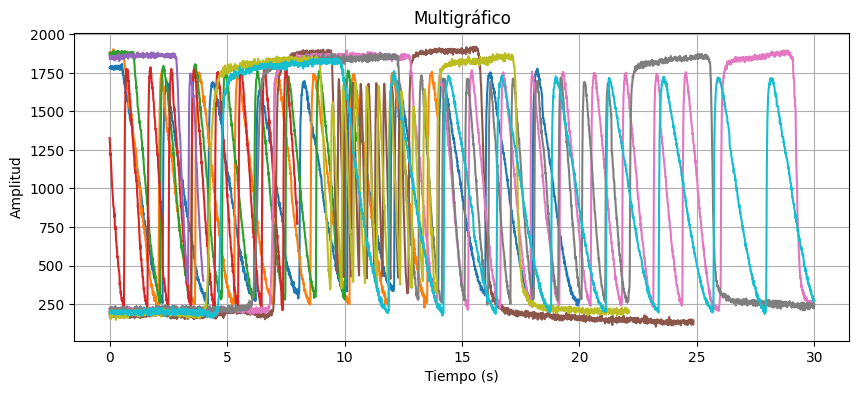

In [360]:
# Acotamos el grafico a la muestra tomada

tiempos_corte_iniciales = [12, 10, 9.5, 11,  9,  0,  0,  0,  0,  0 ]
tiempos_corte_finales =   [32, 24, 20,  19, 13, 30, 30, 30, 30, 30]

muestra_en_tci = []
muestra_en_tcf = []
seniales_acot = []
tiempos_acot = []

# Muestra de corte
for i in range(len(seniales)):
    muestra_en_tci.append(int(tiempos_corte_iniciales[i] * fs))
    muestra_en_tcf.append(int(tiempos_corte_finales[i] * fs))
    senial_acotada = seniales[i][muestra_en_tci[i]:muestra_en_tcf[i]]
    seniales_acot.append(senial_acotada)

    # Recalculamos el vector de tiempo para cada señal acotada
    tiempo_acotado = np.arange(len(senial_acotada)) / fs
    tiempos_acot.append(tiempo_acotado)

# Graficar
graficar_multisignales(tiempos_acot, seniales_acot)


## FFT

Aplicamos la transformada rapida de Fourier a la señal acotada

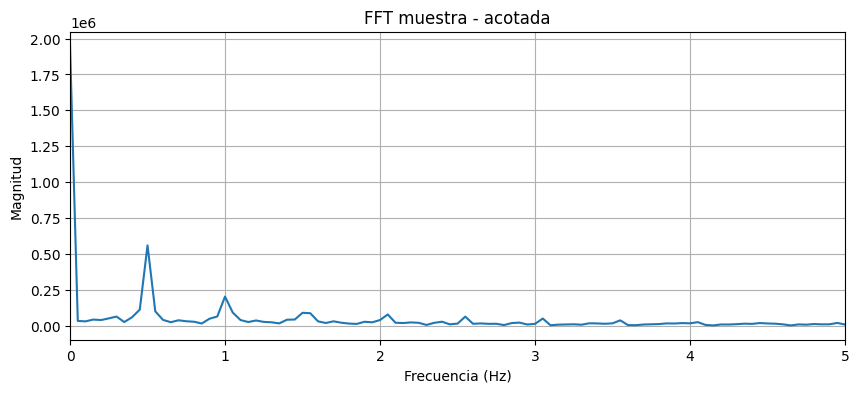

In [346]:
# Calcula la FFT de la señal
fft(ldr_acot,
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT muestra - acotada',
    grid=True)

***Análisis del gráfico FFT (muestra acotada):***  
1. Podemos apreciar un pico cerca de la frecuencia de 0 Hz, esto puede representar la parte casi-contínua que obtuvimos antes y después de la muestra como tal.  
2. Es posible visualizar que, existe una frecuencia fundamental rondando los 0,5 Hz y lugo le suceden sus respectivos armónicos cada medio Hert.  

Que pasa si le aplicamos la fft a la señal original sin acotar?...

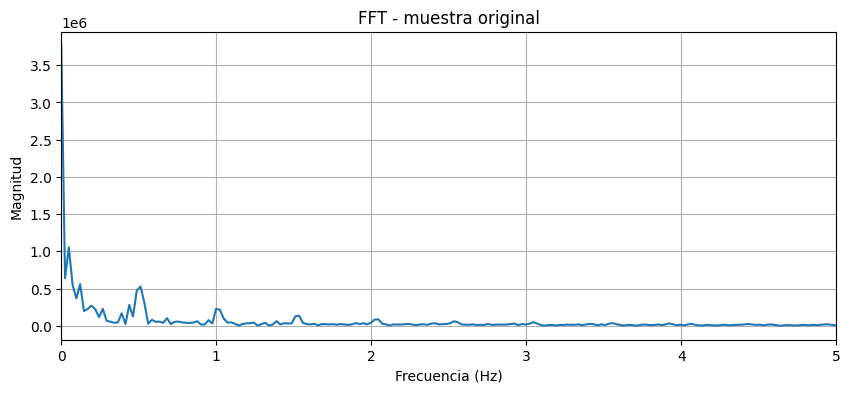

In [347]:
fft(ldr_fs100Hz_60imgs_60fps,
    fs, xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - muestra original',
    grid=True)

***Análisis del gráfico FFT (muestra original):***  
1. Se puede apreciar el aumento de frecuencias bajas en la zona entre [0-1] Hz. Probablemente representen las componentes de continua antes y despues del muestreo.
2. Se puede ver un agregado de frecuencias mas rapidas las cuales pueden deberse a esta distorsion fluctuante en las zonas de continua.

#Bibliografía

https://www.luisllamas.es/medir-nivel-luz-con-arduino-y-fotoresistencia-ldr/